# ***Introduction to Radar Using Python and MATLAB***
## Andy Harrison - Copyright (C) 2019 Artech House
<br/>

# Rectangular Plate Radar Cross Section
***

Referring to Section 7.4.1.4, consider the scattering from a three-dimensional object; specifically, a rectangular conducting plate, as shown in Figure 7.9.  

For TEx polarization, the bistatic radar cross section can be written as (Equation 7.35)

$$
    \sigma = 4\pi\left( \frac{ab}{\lambda}\right)^2 (\cos^2\theta_o \sin^2\phi_o + \cos^2\phi_o)\left[ \frac{\sin(X)}{X}\right]^2\, \left[ \frac{\sin(Y)}{Y}\right]^2 \hspace{0.0in} \text{(m}^2\text{)},
$$

For the TMx polarization, the bistatic radar cross section can be written as (Equation 7.38)

\begin{align}
    \sigma = 4\pi\left( \frac{ab}{\lambda}\right)^2\big[\cos^2\theta_i (&\cos^2\theta_o \cos^2\phi_o + \sin^2\phi_o)\big]\, \nonumber \\ &\times\left[ \frac{\sin(X)}{X}\right]^2\, \left[ \frac{\sin(Y)}{Y}\right]^2 \hspace{0.5in} \text{(m}^2\text{)},
\end{align}

For the monostatic case, the expressions in (Equation 7.35) and (Equation 7.38) reduce to the same equation, given here as

$$
    \sigma = 4\pi\left( \frac{ab}{\lambda}\right)^2\cos^2\theta_i \left[ \frac{\sin(kb\sin\theta_i)}{kb\sin\theta_i}\right]^2 \hspace{0.5in} \text{(m}^2\text{)},
$$


For the TMx polarization, the maximum of scattered field always occurs at the specular angle.  However, this is not true for the TEx polarization, although it does approach the specular angle as the dimensions of the plate become large compared to the wavelength.  As well, the monostatic radar cross section for the flat plate is the same for both TMx and TEx polarizations.  This is also true for the two-dimensional plate.  Measurements have shown that these two values are slightly different.
***

Begin by getting the library path

In [1]:
import lib_path

Set the operating frequency (Hz), the plate width (m), the plate length (m), the incident angle theta (degrees) and the observation angle (phi) (degrees)

In [2]:
frequency = 1e9

width = 2.0

length = 5.0

incident_theta = 15.0

observation_phi = 270.0

Set up the observation angles theta (degrees) using the `linspace` routine from `scipy`

In [3]:
from numpy import linspace

observation_theta = linspace(-90, 90, 1801)

Calculate the radar cross section (m^2) of the rectangular plate

In [4]:
from Libs.rcs.rectangular_plate import radar_cross_section

rcs_tm, rcs_te = radar_cross_section(frequency, width, length, incident_theta, observation_theta, observation_phi)

Display the radar cross section (dBsm) of the rectangular plate

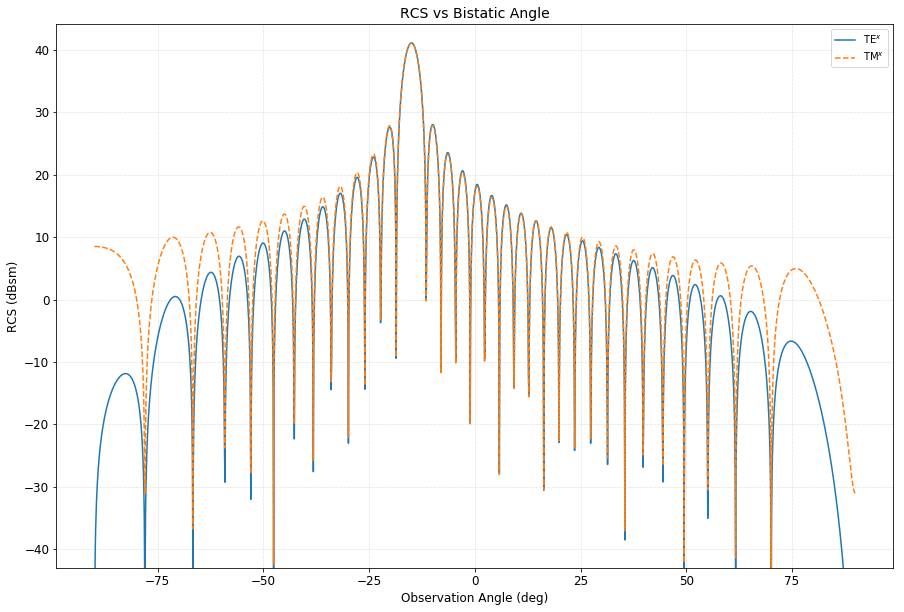

In [6]:
from matplotlib import pyplot as plt

from numpy import log10


# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)



# Display the results

plt.plot(observation_theta, 10.0 * log10(rcs_te + 1e-10), '', label='TE$^x$')

plt.plot(observation_theta, 10.0 * log10(rcs_tm + 1e-10), '--', label='TM$^x$')



# Set the plot title and labels

plt.title('RCS vs Bistatic Angle', size=14)

plt.ylabel('RCS (dBsm)', size=12)

plt.xlabel('Observation Angle (deg)', size=12)

plt.ylim(min(10.0 * log10(rcs_te + 1e-4)) - 3, max(10.0 * log10(rcs_te + 1e-4)) + 3)



# Set the tick label size

plt.tick_params(labelsize=12)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)


# Set the legend

plt.legend(loc='upper right', prop={'size': 10})